In [223]:
import pandas as pd, ibm_db, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [225]:
view_all = %sql select * from INTERNATIONAL_STUDENT_TEST_SCORES
df_view_all = view_all.DataFrame()
df_view_all.head()

 * ibm_db_sa://wzt49373:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


,country,first_name,last_name,test_score
0,United States,Marshall,Bernadot,54
1,Ghana,Celinda,Malkin,51
2,Ukraine,Guillermo,Furze,53
3,Greece,Aharon,Tunnow,48
4,Russia,Bail,Goodwin,46


 * ibm_db_sa://wzt49373:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


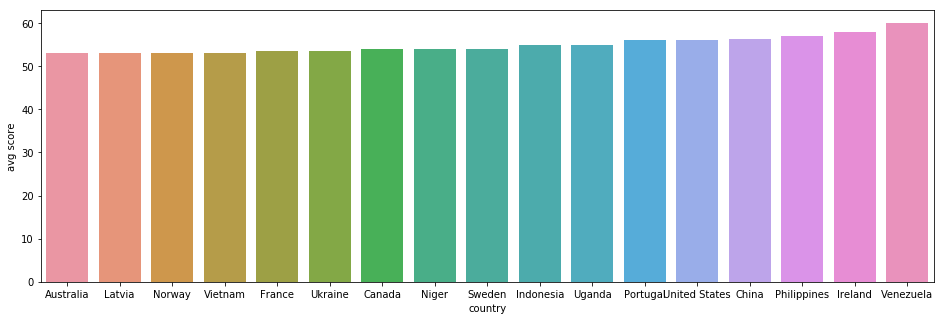

In [226]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#
#
t_country = %sql select Country as "country", avg(test_score) as "avg score"\
from INTERNATIONAL_STUDENT_TEST_SCORES\
where test_score > (select avg(test_score)*1.05 from INTERNATIONAL_STUDENT_TEST_SCORES)\
group by country;
#
#
df_t_countr = t_country.DataFrame().sort_values(by='avg score')
plt.figure(figsize=(16, 5))
plot = seaborn.barplot(y='avg score',x='country', data=df_t_countr)